In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
plt.style.use('fivethirtyeight')
# Based on excerpt from Python Data Science Handbook by Jake VanderPlas
from IPython.display import Javascript


In [14]:

Javascript("""
// On 2/7/14 1:57 PM, Juergen Hasch writes:
// This is my hack. Slow as hell for anything larger than some 10k.

window.addEventListener('paste', function(event){
    var cell = IPython.notebook.get_selected_cell();
    var items = event.clipboardData.items;
    for (var i = 0; i < items.length; ++i) {
        if (items[i].kind == 'file' && items[i].type.indexOf('image/') !== -1) {
            var blob = items[i].getAsFile();
            window.URL = window.URL || window.webkitURL;
            var blobUrl = window.URL.createObjectURL(blob);
            var img = document.createElement('img');
            img.src = blobUrl;

            var reader = new FileReader();
            reader.onload = ( function(evt) {
                var new_cell = IPython.notebook.insert_cell_below('markdown');
                var str = '<img src="' + evt.target.result + '">';
                new_cell.set_text(str);
                new_cell.edit_mode();
                new_cell.execute();
                } );
            reader.readAsDataURL(blob);
        }
    }
});
""")

<IPython.core.display.Javascript object>

[1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3
 3 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 0 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 0 3 1 1 0 2 1 2 1 1 1 1 2 1 2 3 2 2 1 3 2 2 3 0 3 3 2 0 2 0 2 3 0
 3 3 3 0 3 0 1 2 3 2 1 0 3 0 0 1 0 2 2 0 1 0 0 3 1 0 2 3 1 1 0 2 1 0 2 2 0
 0 0 0 1 3 0 2 0 0 2 2 2 0 2 3 0 2 1 2 0 3 2 3 0 3 0 2 0 0 3 2 2 1 1 0 3 1
 1 2 1 2 0 3 3 0 0 3 0 1 2 0 1 2 3 2 1 0 1 3 3 3 3 2 2 3 0 2 1 0 2 2 2 1 1
 3 0 0 2 1 3 2 0 3 0 1 1 2 2 0 1 1 1 0 3 3 1 1 0 1 1 1 3 2 3 0 1 1 3 3 3 1
 1 0 3 2]


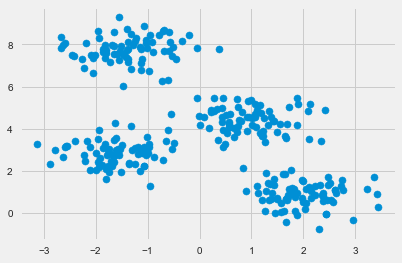

In [21]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
print(y_true)

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

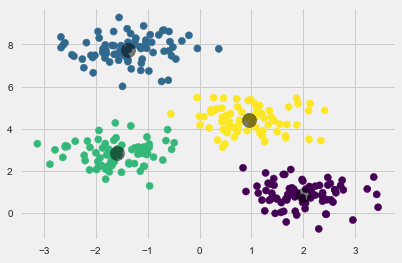

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

K-means algorithm assigns the points to clusters very similarly to how might assign them by eye. It's interesting because the number of possible combinations of cluster assignments is exponential in the number of data points (e^ (# of data points)). The k-means approach thankfully involves an intuitive approach know as expectation maximization. 

Expectation maximization is a powerful algorithm that is ubiquitious in data science. The procedures involves a few steps:

* guess some cluster centers
* repeat until converged
1. E-step: assign points to the nearest cluster center
2. M-step: set the cluster centers to the mean.


The E-step or expectation step involves updating our expectation of which cluster each point belongs to. The M-step or maximization step involves maximizing some maximization some fitness function that defines the location of the cluster centers -in this case, that maximization is accomplished by taking a simple mean of the data in each cluster. 

Under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics. We can visualize the algorithm as shown in the following images (after Jakes boilerplate code)



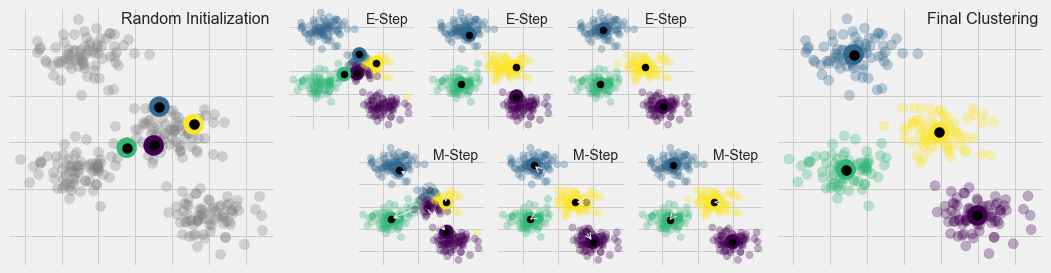

In [17]:
# Creating graphs to de

from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)


fig.savefig('../05.11-expectation-maximization.png')

The k-Means algorithm is simple enough to be written in a few lines of code. 



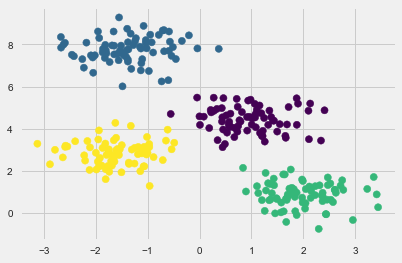

In [22]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [42]:
rng = np.random.RandomState(2)

In [62]:
num = rng.permutation(300)[:4]

In [63]:
num.shape

(4,)

In [64]:
num

array([289, 141, 131, 207])

In [47]:
center = X[num]
center

array([[ 0.27239604,  5.46996004],
       [-1.36999388,  7.76953035],
       [ 0.08151552,  4.56742235],
       [-0.6149071 ,  3.94963585]])

In [48]:
X.shape

(300, 2)

In [54]:
# 1. Randomly choose clusters
rng = np.random.RandomState(2)
i = rng.permutation(X.shape[0])[:4]
centers = X[i]

# while True:
#     # 2a. Assign labels based on closest center
#     labels = pairwise_distances_argmin(X, centers)

#     # 2b. Find new centers from means of points
#     new_centers = np.array([X[labels == i].mean(0)
#                             for i in range(4)])
#     plt.scatter(X[:, 0], X[:, 1], c=labels,
#         s=50, cmap='viridis');
#     # 2c. Check for convergence
#     if np.all(centers == new_centers):
#         break
#     centers = new_centers



# centers, labels = find_clusters(X, 4)
# plt.scatter(X[:, 0], X[:, 1], c=labels,
#         s=50, cmap='viridis');

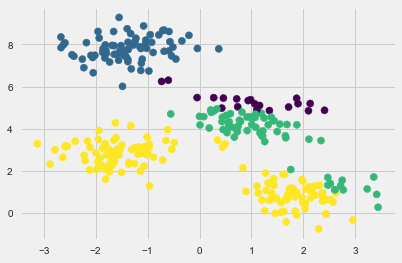

In [58]:
labels = pairwise_distances_argmin(X, centers)

# 2b. Find new centers from means of points
new_centers = np.array([X[labels == i].mean(0)
                        for i in range(4)])
plt.scatter(X[:, 0], X[:, 1], c=labels,
    s=50, cmap='viridis');
# 2c. Check for convergence
if np.all(centers == new_centers):
    centers = new_centers


This is an example of poor convergence, the argmin optimization may not converge to a global minimum. This can be offset by testing out various hyperparameters, specifically the number of centroids the model is trying to place.


K-means algorithm should dynamically scale the number of centroids based on some optimizer algorithm for the model, however it will find the best clusters with the pre-set number of clusters even if the number of clusters isnt ideal to the data we are trying to segment. 

Moreover, k-means will be ineffective if the clusters have complicated geometries. Also, the clusters will always be linear, which means that it will fail for more complicated boundaries. Here is a motivating example: 

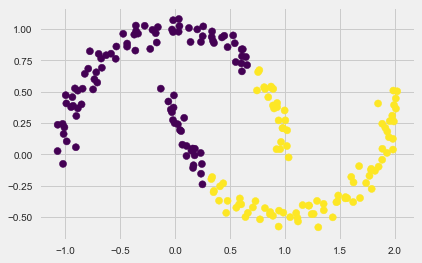

In [65]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

We can use a kernalized k-means spectral clustering estimator. In this the model uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm. 

C:\Users\markt\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


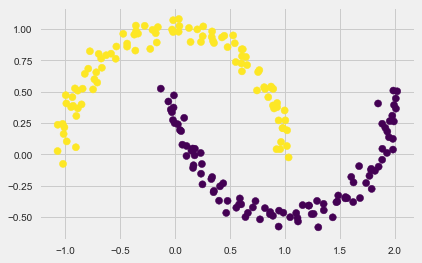

In [66]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In practice Spectral Clustering is very useful when the structure of
the individual clusters is highly non-convex or more generally when
a measure of the center and spread of the cluster is not a suitable
description of the complete cluster. For instance when clusters are
nested circles on the 2D plan.

K-means can be slow for large numbers of samples: each iteration of k-means must access every point in the data, thus it is expected (a linear?) increase in computation as the sample grows. We can offset this by batching the k-means clustering algorithm, and thus updating the cluster centers at each step. Implemented here: sklearn.cluster.MiniBatchKMeans  

K-means can create a classifier without any labels, moreover, we can use t-distributed stochastic neighbor embedding (t-SNE) algorithm (related to Manifold Learning) to pre-process the data before performing k-means. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters. The power of unsupervised learning is that when used carefully it can extract information from the dataset that might be difficult to do by hand or by eye. 

In [79]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
from sklearn.manifold import TSNE
from scipy.stats import mode
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)




0.9326655537006121

Impressive but deep learning (specifically convolutional neural networks) still take the cake for image classification

In [120]:
from __future__ import print_function
import keras
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

x = digits.data
x_train = x.reshape(x.shape[0], 8, 8, 1)

y = digits.target
y_train = keras.utils.to_categorical(y, 10)
input_shape = (8,8,1)
model = Sequential()
model.add(Conv2D(4, kernel_size=(2,2), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=64,
          epochs=30,
          verbose=1,)

Epoch 1/30
1797/1797 [==============================] - 1s 331us/step - loss: 3.5781 - acc: 0.1208
Epoch 2/30
1797/1797 [==============================] - 0s 88us/step - loss: 1.8035 - acc: 0.3745
Epoch 3/30
1797/1797 [==============================] - 0s 88us/step - loss: 1.2503 - acc: 0.6188
Epoch 4/30
1797/1797 [==============================] - 0s 90us/step - loss: 0.8806 - acc: 0.7707
Epoch 5/30
1797/1797 [==============================] - 0s 89us/step - loss: 0.6513 - acc: 0.8453
Epoch 6/30
1797/1797 [==============================] - 0s 86us/step - loss: 0.5259 - acc: 0.8770
Epoch 7/30
1797/1797 [==============================] - 0s 87us/step - loss: 0.4311 - acc: 0.8954
Epoch 8/30
1797/1797 [==============================] - 0s 87us/step - loss: 0.3709 - acc: 0.9115
Epoch 9/30
1797/1797 [==============================] - 0s 93us/step - loss: 0.3334 - acc: 0.9226
Epoch 10/30
1797/1797 [==============================] - 0s 90us/step - loss: 0.3001 - acc: 0.9260
Epoch 11/30
1797/1

In [112]:
x.shape

(1797, 64)

Instead of K-Means let's look at Gaussian Mixture Models